# Проект: Анализ бизнес показателей

**Описание проекта:** Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс. 

**Цель проекта:** Цель данной работы заключается в том, чтобы провести анализ причин, которые привели компанию к убыточности и предложить решения, направленные на выход из этой ситуации и достижение положительных финансовых результатов.

**Описание данных:** В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

- Структура **visits_info_short.csv:**

**User Id** — уникальный идентификатор пользователя,

**Region** — страна пользователя,

**Device** — тип устройства пользователя,

**Channel** — идентификатор источника перехода,

**Session Start** — дата и время начала сессии,

**Session End** — дата и время окончания сессии.


- Структура **orders_info_short.csv:**

**User Id** — уникальный идентификатор пользователя,

**Event Dt** — дата и время покупки,

**Revenue** — сумма заказа.


- Структура **costs_info_short.csv:**

**dt** — дата проведения рекламной кампании,

**Channel** — идентификатор рекламного источника,

**costs** — расходы на эту кампанию.

**План работы:**
1. Загрузить данные и подготовьте их к анализу
2. Задайть функции для расчёта и анализа LTV, ROI, удержания и конверсии
3. Провести исследовательский анализ данных
4. Оценить маркетинг
5. Оценить окупаемость рекламы
6. Написать выводы

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np

## Загрузите данные и подготовьте их к анализу

In [2]:
# функция дло открытия файлов и последующая проверка правильности выполнения
def open_csv(file_path_platform, file_path_loc, columns):
    
    # указываем путь на платформе
    try:
        name = pd.read_csv(file_path_platform, parse_dates=columns, dayfirst=True)
    except:
        
        # указываем путь локально
        try:
            name = pd.read_csv(file_path_loc, parse_dates=columns, dayfirst=True)
        except :
            name = None
            
    # делаем проверку на првильно считывание
    if name is None:
        print('Что-то не так')
    else:
        print('Данные успешно загружены')
        print('*' * 40)
        print('Вывожу первые 10 сторк датафрейма:')
        display(name.head(10))
        print('*' * 40)
        print('Выведем названия столбцов до обработки:', name.columns)
        name.columns = name.columns.str.lower().str.replace(' ', '_')
        print('Выведем названия столбцов после обработки:', name.columns)
        print('*' * 40)
        print('Количество явных дубликатов:', name.duplicated().sum())
        print('*' * 40)
        print('Вывожу основную информацию о датафрейме:')
        name.info()
    return name 

In [3]:
visits = open_csv('/datasets/visits_info_short.csv', 
                  '/Users/sergey/Downloads/visits_info_short.csv', 
                  ['Session Start', 'Session End']            
                 )

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


****************************************
Выведем названия столбцов до обработки: Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')
Выведем названия столбцов после обработки: Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
****************************************
Количество явных дубликатов: 0
****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901

**Датафрейм visits содержит 309900 строк и 6 столбцов**

In [4]:
orders = open_csv('/datasets/orders_info_short.csv', 
                  '/Users/sergey/Downloads/orders_info_short.csv',
                  ['Event Dt']
                 )

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


****************************************
Выведем названия столбцов до обработки: Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')
Выведем названия столбцов после обработки: Index(['user_id', 'event_dt', 'revenue'], dtype='object')
****************************************
Количество явных дубликатов: 0
****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Датафрейм orders содержит 40211 строк и 3 столбца**

In [5]:
costs = open_csv('/datasets/costs_info_short.csv', 
                 '/Users/sergey/Downloads/costs_info_short.csv',
                 ['dt']                
                )

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


****************************************
Выведем названия столбцов до обработки: Index(['dt', 'Channel', 'costs'], dtype='object')
Выведем названия столбцов после обработки: Index(['dt', 'channel', 'costs'], dtype='object')
****************************************
Количество явных дубликатов: 0
****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


**Датафрейм costs содержит 1799 строк и 3 столбца**

**Вывод:** В ходе загрузки данных, отсутствуют пропуски в данных и явные дубликаты. Заменили столбцы с датами на тип datetime. Названия столбцов так же привели к стилисически правильному.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.



Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания пользовательских профилей

In [6]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчёта удержания

In [7]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [8]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI

In [9]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [10]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

In [11]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [12]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [13]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
        
Все необходимые функции были заданы, можно приступать к анализу. В принципе можно было добавить `markdown` заголовков, чтобы разграничить функции и упростить поиск нужной

</div>

## Исследовательский анализ данных

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [14]:
# функция для создания пользовательских профилей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [15]:
profiles_dt_min = profiles['dt'].min() 
print('Минимальная дата привлечения клиенттов:', profiles_dt_min)
print()
profiles_dt_max = profiles['dt'].max()
print('Максимальная дата привлечения клиенттов:', profiles_dt_max)
print()
# 
delta_data = (profiles_dt_max - profiles_dt_min).days
print('Количество дней между максимальным и минимальным значением:', delta_data)

Минимальная дата привлечения клиенттов: 2019-05-01 00:00:00

Максимальная дата привлечения клиенттов: 2019-10-27 00:00:00

Количество дней между максимальным и минимальным значением: 179


**Вывод:** Минимальная дата привлечения пользователей 1 мая 2019 года, а максимальная дата 27 октября 2019 года. Таким образом у нас имеются данные за 179 дней

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [55]:
# сгрупируем данные по регионам и посчитаем количество пользователей
count_uesrs = (
    profiles.groupby('region')
    .agg({'user_id' : 'nunique',
         'payer': 'mean'})
    .assign(payer_region=lambda x: x['payer'] * 100)
    .drop(columns=(['payer']))
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id' : 'user_region'})
    .reset_index()

)

# посчитаем общее количество пользователей
total_users = count_uesrs['user_region'].sum()

# найдем процент пользователей от общего количества
count_uesrs['percent_users'] = count_uesrs['user_region'] / total_users * 100

# Форматирование столбца 'perc' для отображения в процентах с двумя знаками после запятой
count_uesrs = count_uesrs.style.format({'percent_users': '{:.2f}%',
                                       'payer_region': '{:.2f}%'})

#count_uesrs = count_uesrs.drop(columns=['payer'])
count_uesrs

,region,user_region,payer_region,percent_users
0,United States,100002,6.90%,66.66%
1,UK,17575,3.98%,11.72%
2,France,17450,3.80%,11.63%
3,Germany,14981,4.11%,9.99%


**Вывод:** Больше всего новых пользователей пришло с США - 66%, доля платящих пользователей составляет 6.9%, меньше всего пришло с Германии - практически 10%, а доля платящих равна 4.11%. Доял платящих пользователей меньше всего у Франции - 3.8%

### Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [58]:
# сгрупируем данные по устройствам с которых заходили пользователи первый раз и посчитаем их количество 
(
    profiles.groupby('device')
    .agg({'user_id' : 'nunique'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id' : 'count_user_device'})
    .reset_index()
)

,device,count_user_device
0,iPhone,54479
1,Android,35032
2,PC,30455
3,Mac,30042


In [18]:
# рассчитаем долю платящих пользователей в зависимости от устройства
(
    profiles.groupby('device')
    .agg({'payer' : 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'payer' : 'payer_user'})
    .reset_index()
)

,device,payer_user
0,Mac,0.063644
1,iPhone,0.062079
2,Android,0.058518
3,PC,0.050468


**Вывод:** 
1. Наибольшее количество пользователей заходят на платформу с устройств iPhone, что указывает на популярность данного устройства среди пользователей.

2. Наименьшее количество пользователей заходят с устройств Mac, что может говорить о более низкой популярности данного устройства среди аудитории платформы.

3. Интересно отметить, что доля пользователей, совершивших покупки, оказалась наибольшей среди пользователей Mac устройств и наименьшей среди пользователей ПК. Это может свидетельствовать о том, что пользователи Mac склонны к совершению покупок чаще, чем пользователи других устройств.

4. В то же время, пользователи ПК проявляют меньший интерес к совершению покупок на платформе, что может потребовать дополнительного изучения и анализа причин такого поведения.




### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [19]:
# сгрупируем данные по каналам с которых заходили пользователи первый раз и посчитаем их количество 
(
    profiles.groupby('channel')
    .agg({'user_id' : 'nunique'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id' : 'channel_user'})
    .reset_index()
)

,channel,channel_user
0,organic,56439
1,FaceBoom,29144
2,TipTop,19561
3,OppleCreativeMedia,8605
4,LeapBob,8553
5,WahooNetBanner,8553
6,RocketSuperAds,4448
7,MediaTornado,4364
8,YRabbit,4312
9,AdNonSense,3880


In [20]:
# рассчитаем долю платящих пользователей в зависимости от канала
(
    profiles.groupby('channel')
    .agg({'payer' : 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'payer' : 'payer_user'})
    .reset_index()
)

,channel,payer_user
0,FaceBoom,0.122049
1,AdNonSense,0.113402
2,lambdaMediaAds,0.104700
3,TipTop,0.096007
4,RocketSuperAds,0.079137
5,WahooNetBanner,0.052964
6,YRabbit,0.038265
7,MediaTornado,0.035747
8,LeapBob,0.030633
9,OppleCreativeMedia,0.027077


**Вывод:** Исходя из предоставленных данных, можно сделать следующие выводы:

1. Наибольшее число пользователей пришли на платформу самостоятельно, что может свидетельствовать о хорошей репутации и привлекательности самой платформы для пользователей.

2. Среди сторонних источников привлечения пользователей лидерами являются FaceBoom - 29144, TipTop - 19561 и OppleCreativeMedia - 8605, в то время как YRabbit - 4312, AdNonSense - 3880 и lambdaMediaAds - 2149 привели наименьшее количество пользователей.

3. При анализе доли пользователей, совершивших покупки, выявлено, что самые активные пользователи пришли с канала FaceBoom (12%), AdNonSense (11%) и lambdaMediaAds (10%). Наименее активные пользователи совершили покупки после перехода с каналов LeapBob, OppleCreativeMedia и organic (2-3%).

4. Интересно отметить, что каналы AdNonSense и lambdaMediaAds, хоть и привели меньше всего пользователей, имеют одни из самых высоких долей активных покупателей. Это может указывать на эффективность данных каналов в привлечении целевой аудитории, готовой к совершению покупок.


## Маркетинг


### Посчитаем общую сумму расходов на маркетинг.

In [21]:
# посчитаем сколько всего быто потрачено денег на рекламы
round(costs['costs'].sum(), 2)

105497.3

Всего на рекламу было потраченно 105497,3 $.

### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [22]:
# отобразим количество рекламы в зависимости от источников
(
    costs.groupby('channel')
    .agg({'costs' : 'sum'})
    .sort_values(by='costs', ascending=False)
)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:** Лидерами по суммет затраченных денег являются каналы TipTop, FaceBoom и WahooNetBanner. 

### Построми график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [23]:
# выделяем неделю и месяц в мемент когда совершались расходы
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

Text(0, 0.5, 'Расходы')

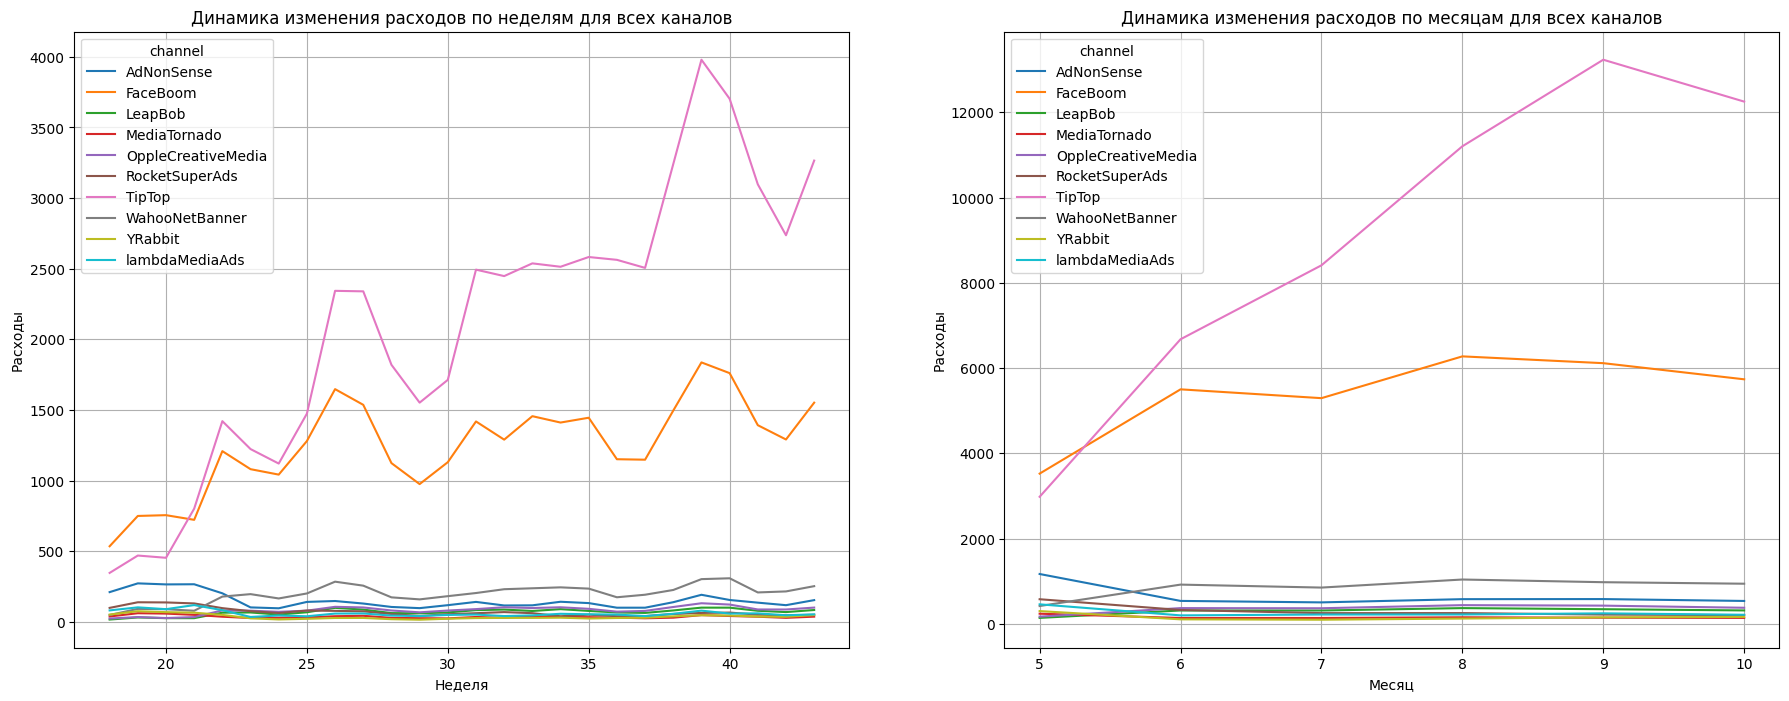

In [24]:
plt.figure(figsize=(22, 8))

costs.pivot_table(
    index='week', 
    columns='channel', 
    values='costs', 
    aggfunc='sum').plot(
    grid=True, 
    ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям для всех каналов')
plt.xlabel('Неделя')
plt.ylabel('Расходы')

costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum').plot(
    grid=True,
    ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика изменения расходов по месяцам для всех каналов')
plt.xlabel('Месяц')
plt.ylabel('Расходы')

**Выводы:** Исходя из данных графиков, можно сделать вывод, что рекламные компании на каналах TipTop и FaceBoob  значительно больше затратили финансовых ресурсов по сравнению с другими каналами в течение определенного временного периода. Остальные каналы стоили  примерно одинаково, за исключением WahooNetBanner, который отличается небольшим увеличением затрат.

### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [25]:
# рассчитаем среднюю стоимость привлечения одного пользователся из каждого источника
(
    profiles.groupby('channel')
    .agg({'acquisition_cost' : 'mean'})
    .rename(columns={'acquisition_cost' : 'average_ad'})
    .sort_values(by='average_ad', ascending=False)
    .reset_index()
    .style.format({'average_ad': '{:.2f}'})    
)

,channel,average_ad
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


**Вывод:** Средняя стоимость рекламы самая дорогая у каналов "TipTop"- 2.8, "FaceBoom"- 1.11, "AdNonSense"-1.01. 
К самым недорогим относятся "MediaTornado", "YRabbit"-0.22 и "LeapBob"-0.21

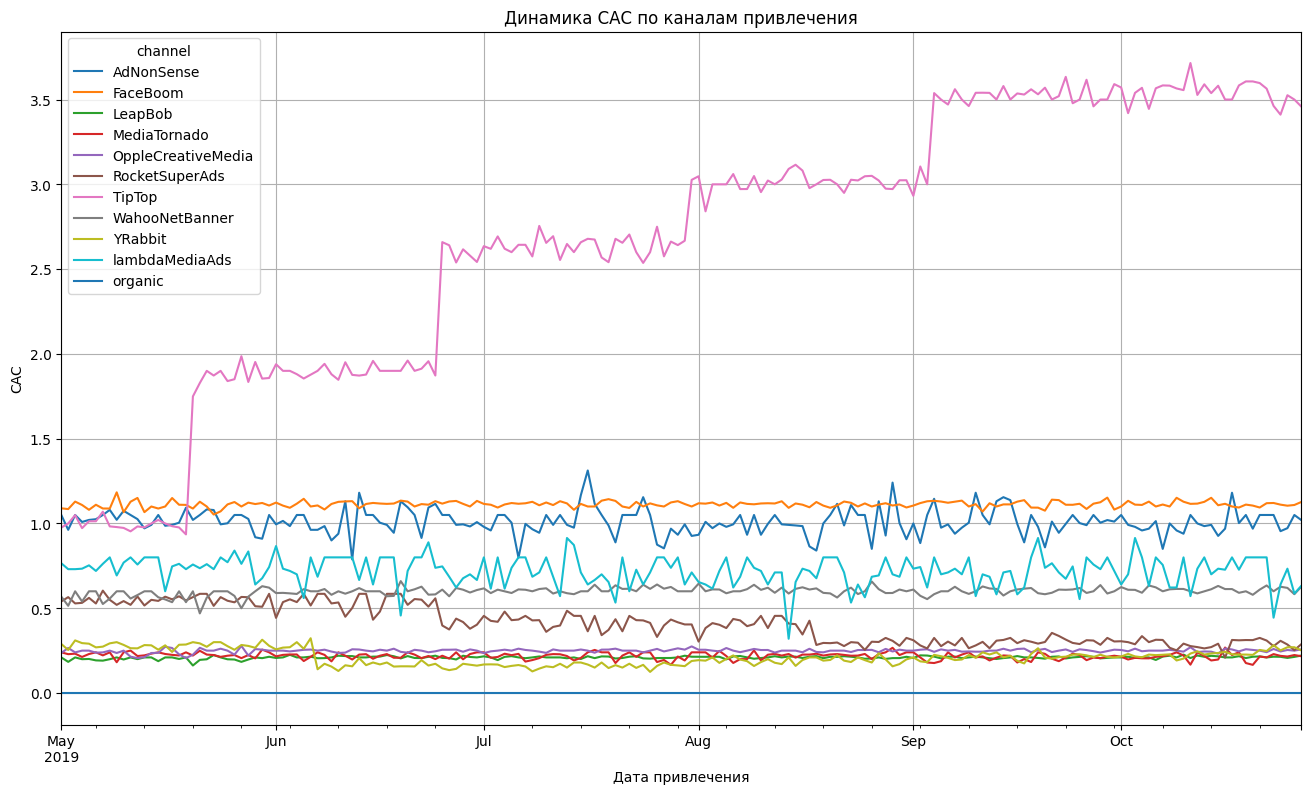

In [26]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(16, 9))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

**Вывод:** 
1. Стоимость привлечения органических пользователей равна нулю, так как они приходят на сайт самостоятельно, без затрат на рекламу.
2. Для пользователей рекламной сети "TipTop" стоимость привлечения постепенно увеличивалась: начиная с 1 доллара и достигая 3,5 доллара к октябрю.
3. Другие рекламные сети имели небольшие отклонения в стоимости привлечения, находясь в диапазоне от 0.3 до 1.2.


## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.


Напишим вывод, опишем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [27]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
profiles_not_organic = profiles.query('channel != "organic"')

In [28]:
profiles_not_organic.groupby('channel').agg({'user_id' : 'nunique'})

,user_id
channel,
AdNonSense,3880
FaceBoom,29144
LeapBob,8553
MediaTornado,4364
OppleCreativeMedia,8605
RocketSuperAds,4448
TipTop,19561
WahooNetBanner,8553
YRabbit,4312


### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

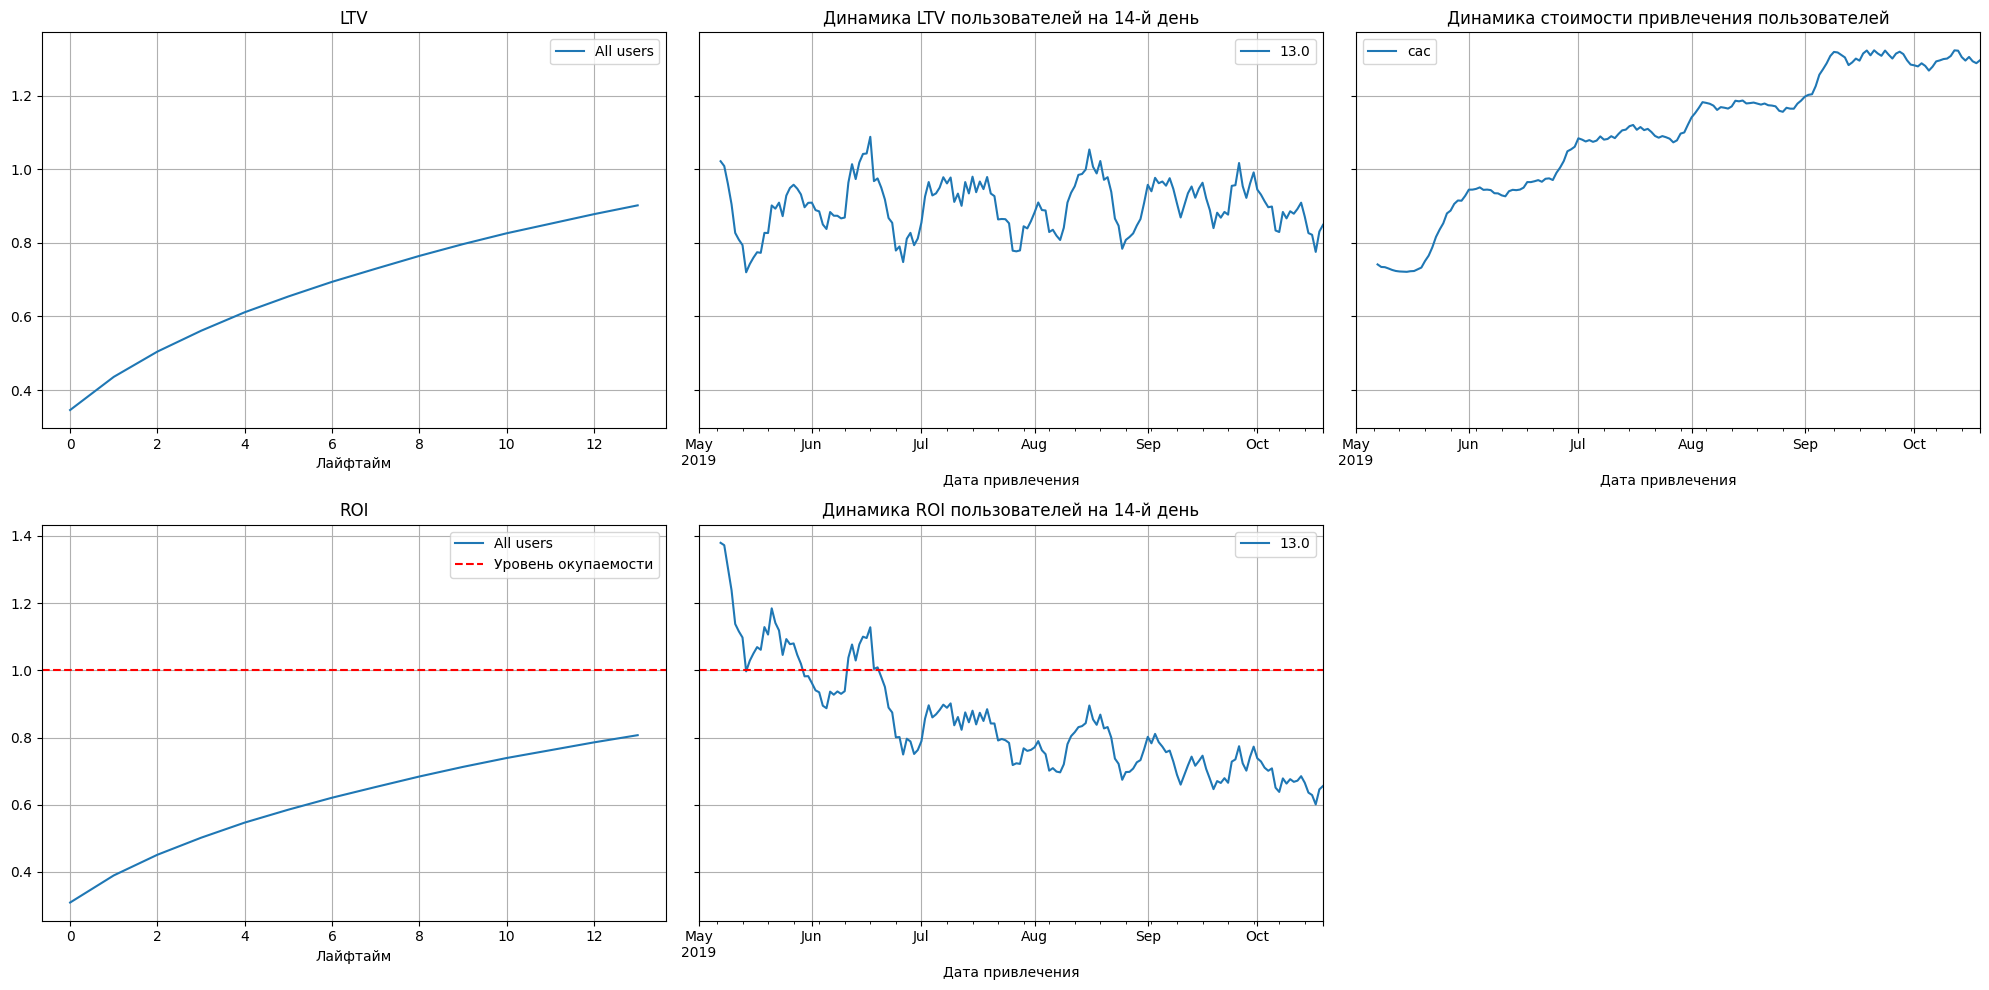

In [29]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** 
- Реклама не окупается
- Стоимость привлечения пользователей растет от месяца к месяцу
- Динамика стоимости привлечения клиентов растет пропорционально каналу TipTop
- Пользователи перестают окупаться уже в августе

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

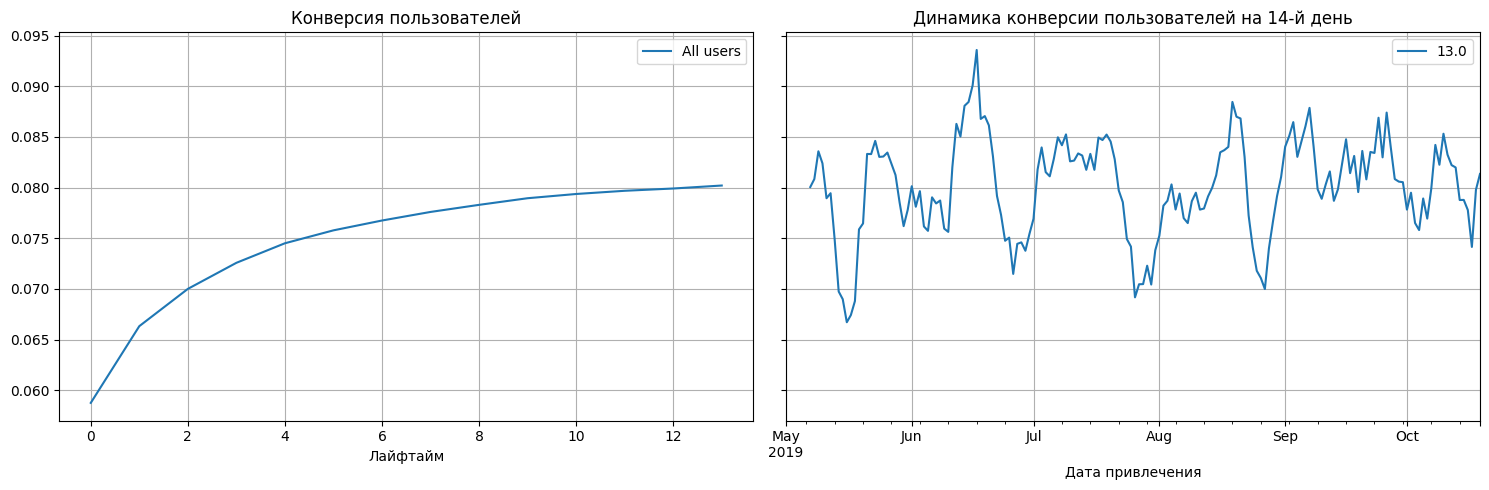

In [30]:
# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Конверсия растет с каждым лайвтаймом

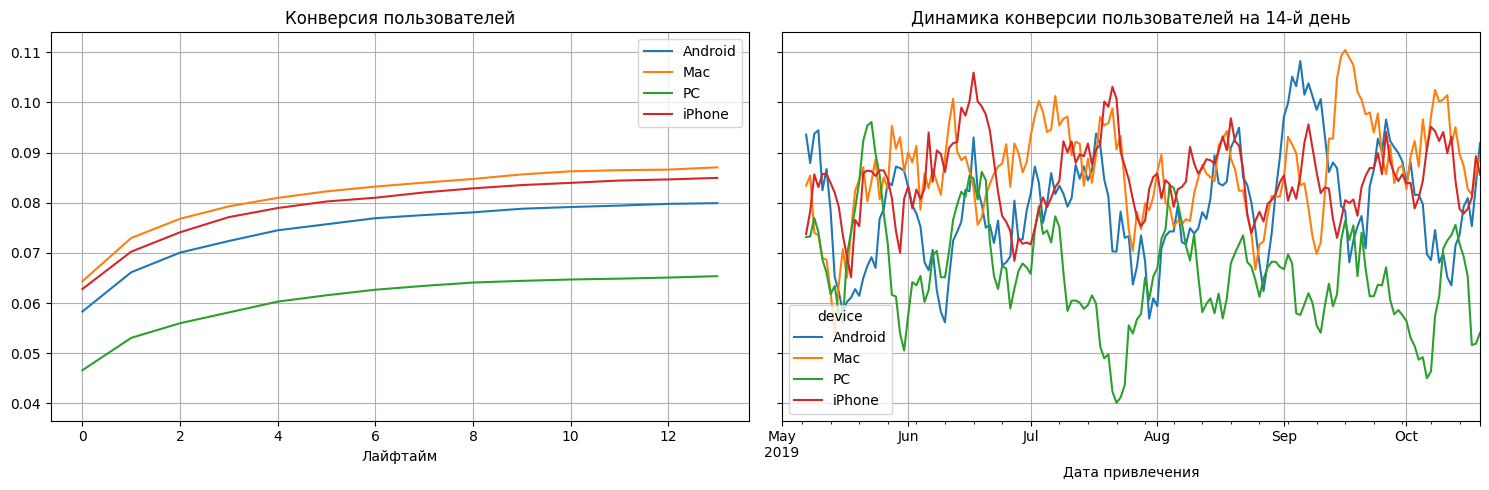

In [31]:
# смотрим конверсию по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Наибольшая конверсия у пользователей Mac и iPhone, хуже всго у пользователей PC

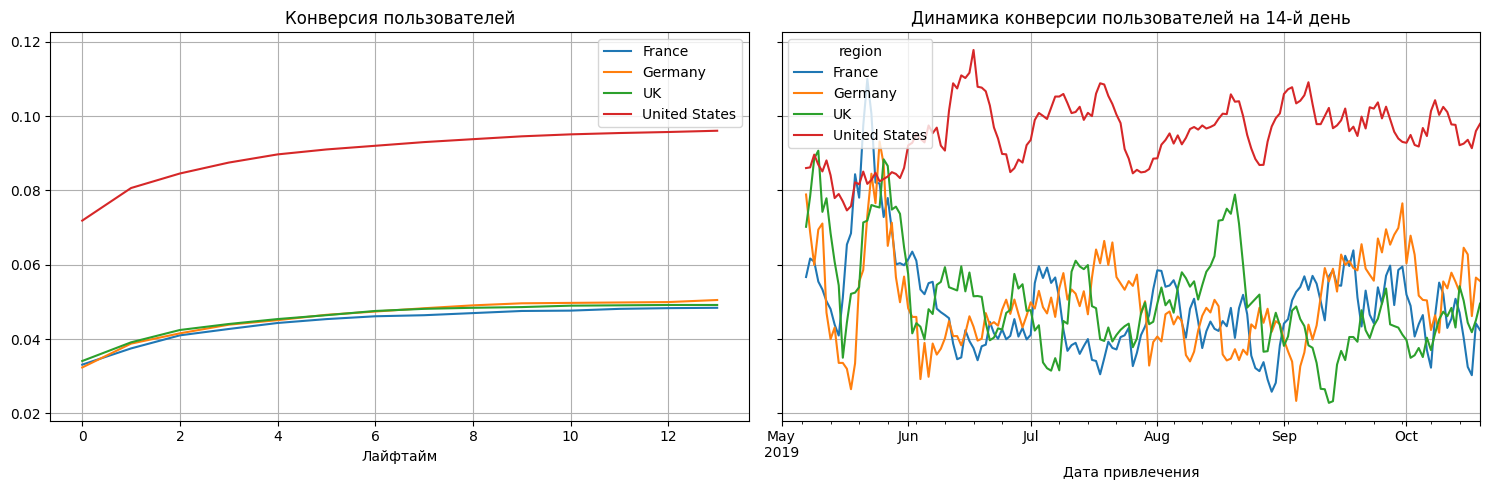

In [32]:
# смотрим конверсию по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Наибольшая конверия у пользователей стран США, показатель отличается от остальных, практически в два раза.

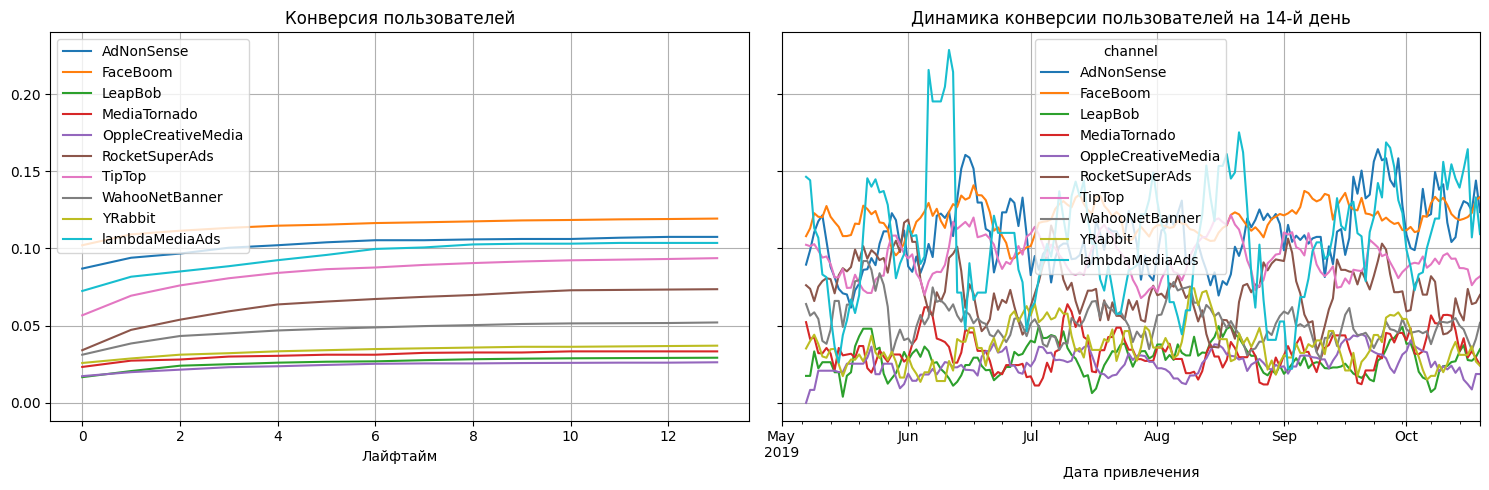

In [33]:
# смотрим конверсию по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Лидируюшие каналы по количеству конверсии - являются каналы TipTop, AdNonSense и LambdaMediaAds.

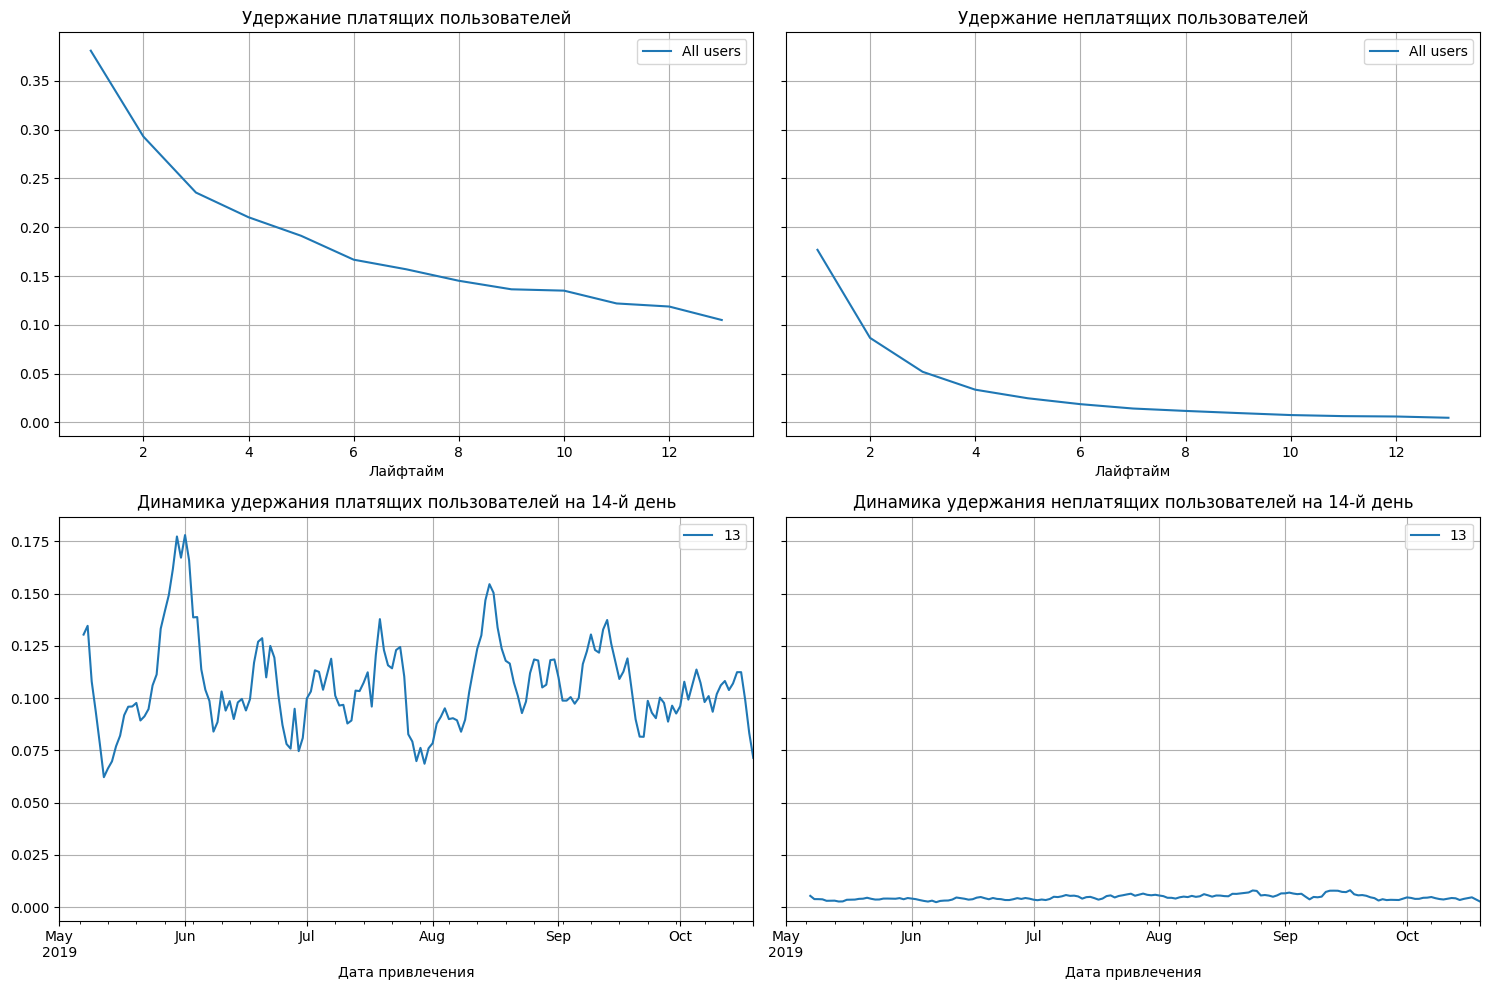

In [34]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** Удержание платящих пользователей сильно выше, чем неплатящих. Обе кривые постоянно снижаются.

### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

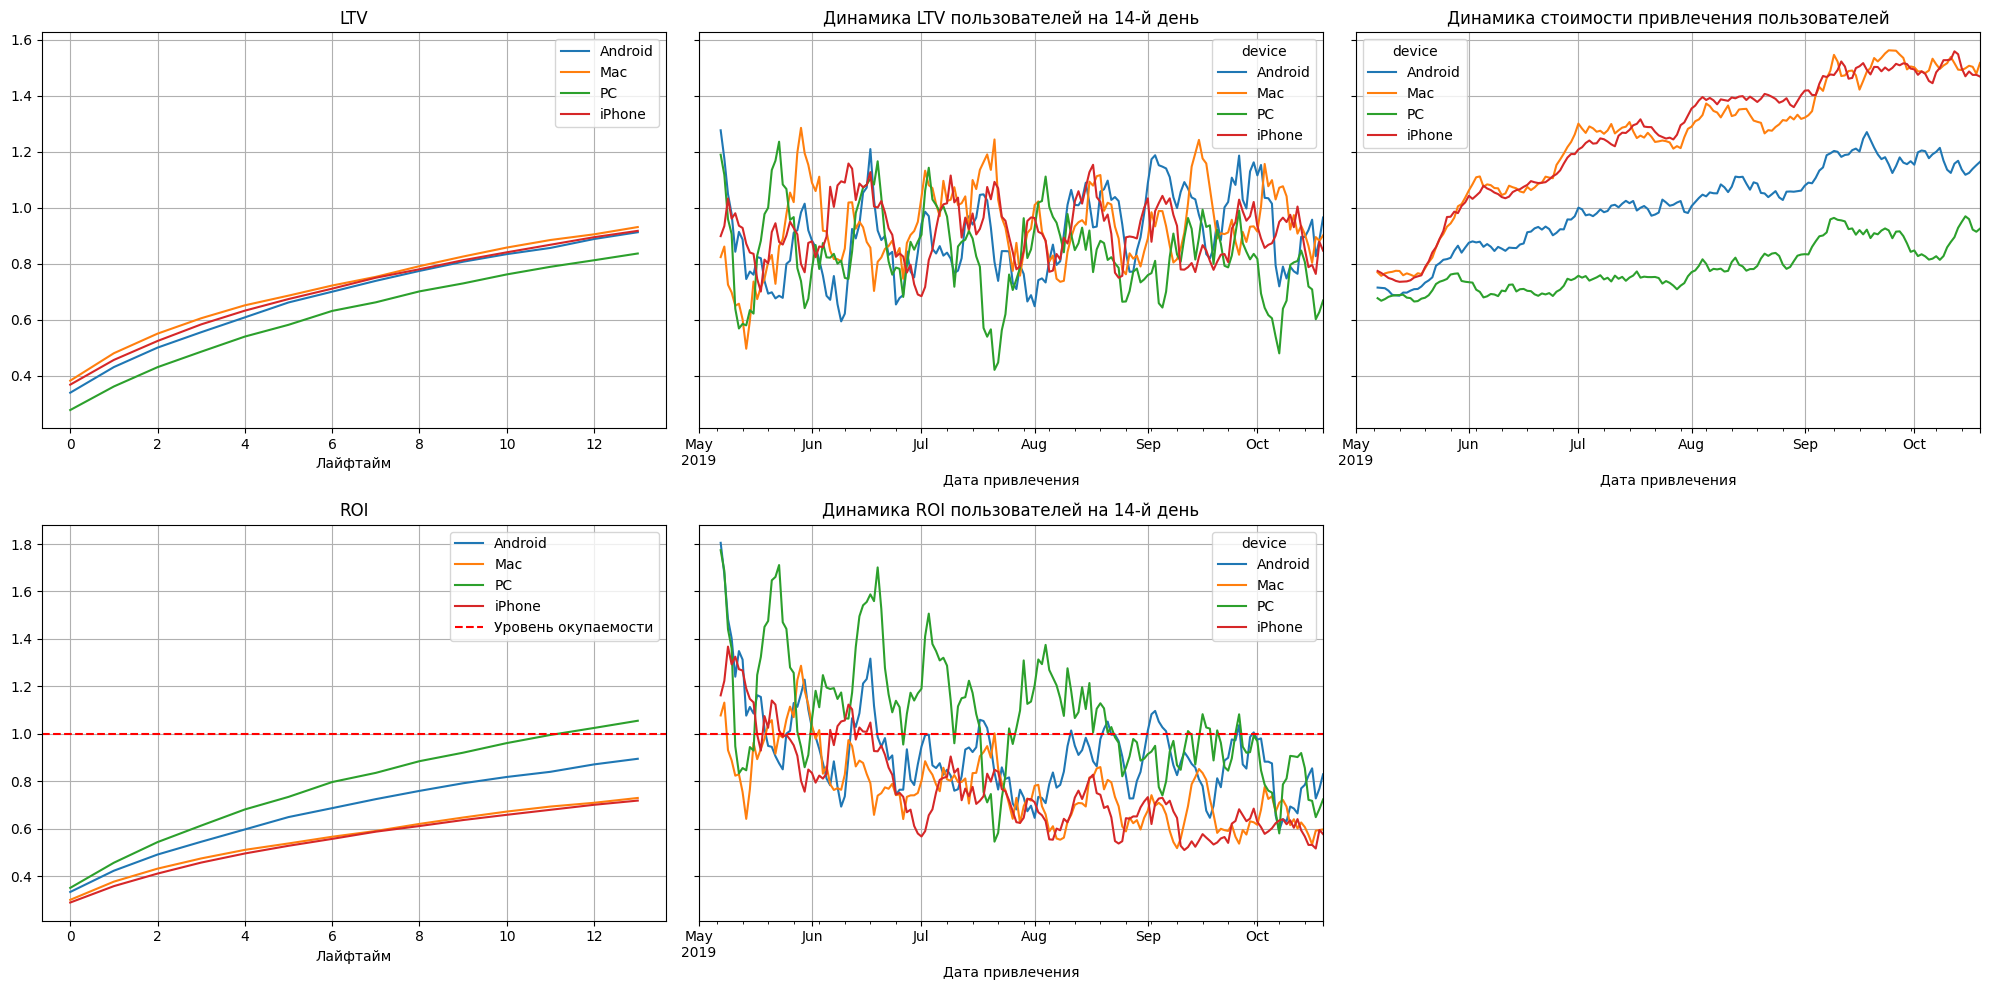

In [35]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** Исходя из предоставленных данных, можно сделать вывод, что пользователи PC окупаются к 11 дню, в отличии от  пользователей iPhone, Mac и Android. Так же стоимость привлечения владельцев iPhone и Mac выше, чем у других устройств. Несмотря на это, большинство пользователй имеют устройства iPhone.

### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

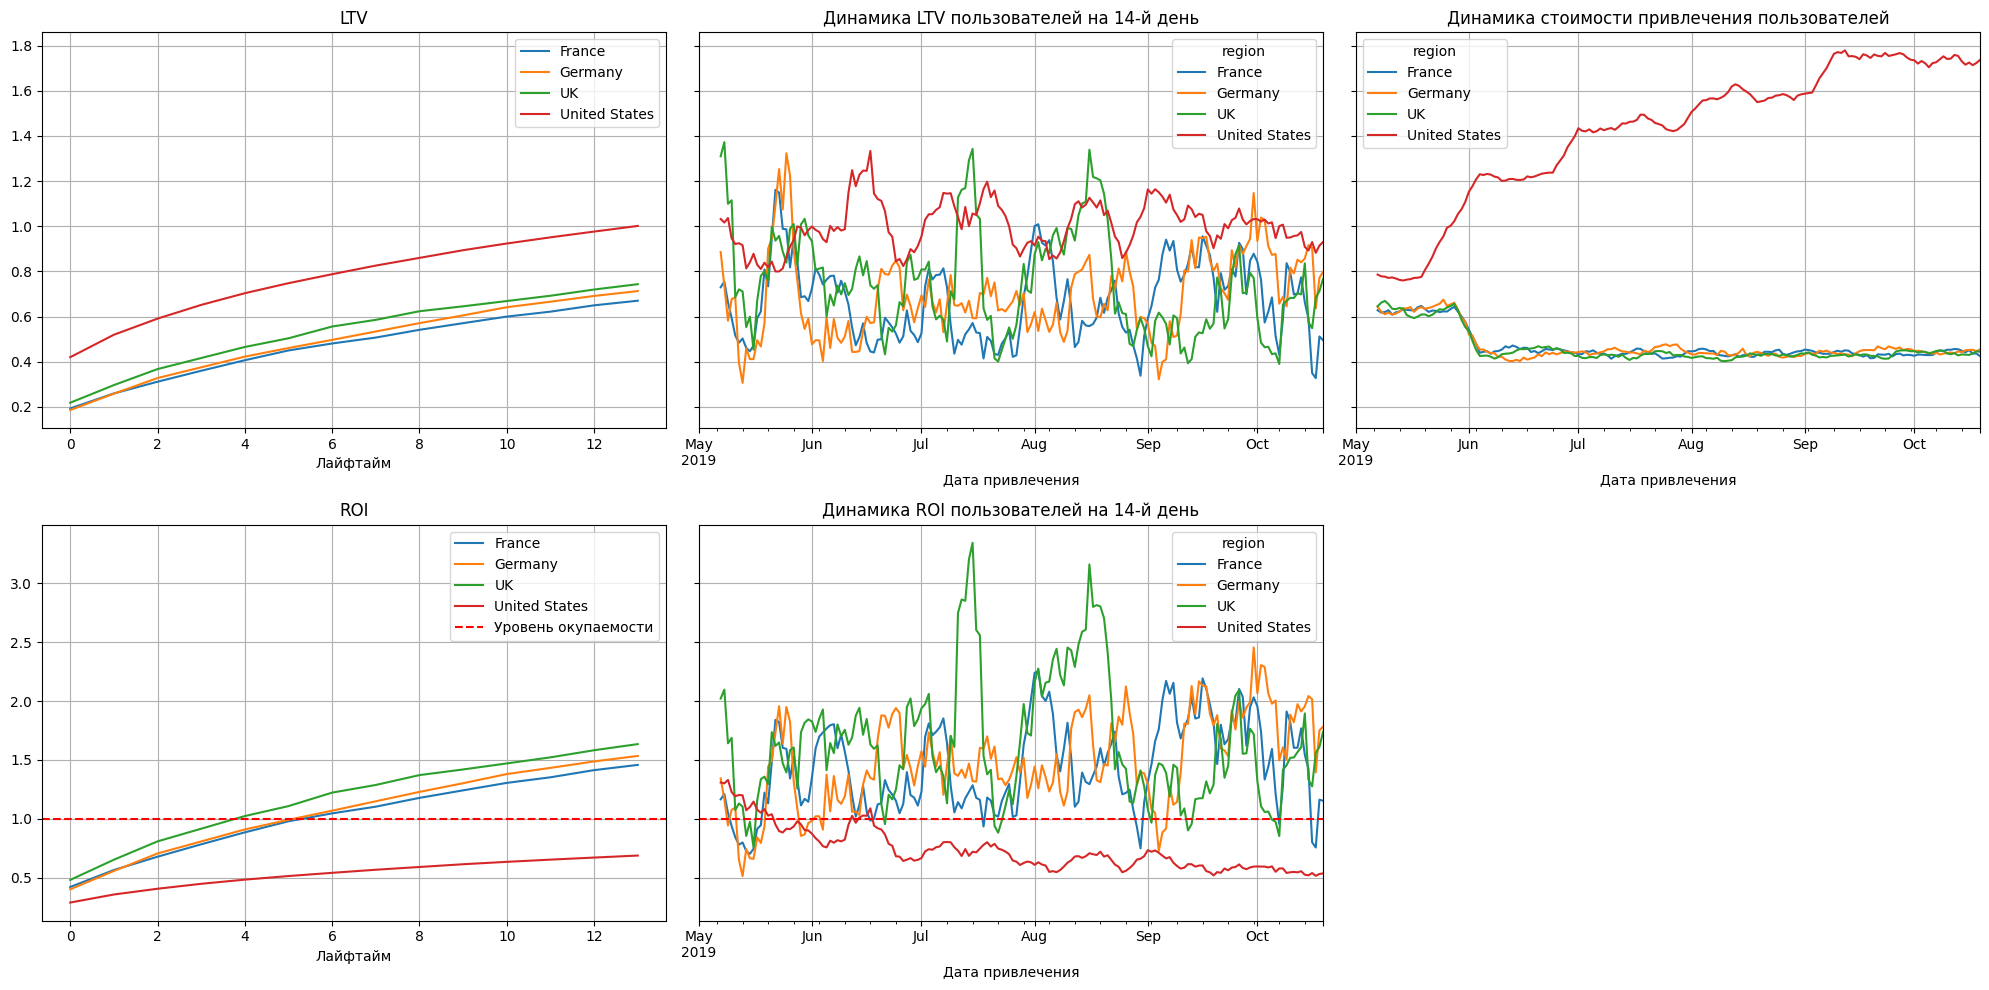

In [36]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** 
1. Пользователи из всех стран, кроме США, окупаются быстрее (на 4-5 день), в то время как пользователи из США не окупаются к 14 дню.
2. Показатель LTV у пользователей из США самый высокий, несмотря на отсутствие окупаемости в рассматриваемый период.
3. Привлечение пользователей из США обходится гораздо дороже, чем пользователей из других стран.
4. Пользователей из США значительно больше - 100 тысяч, что в более чем 4 раза превышает количество пользователей из других стран.


### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

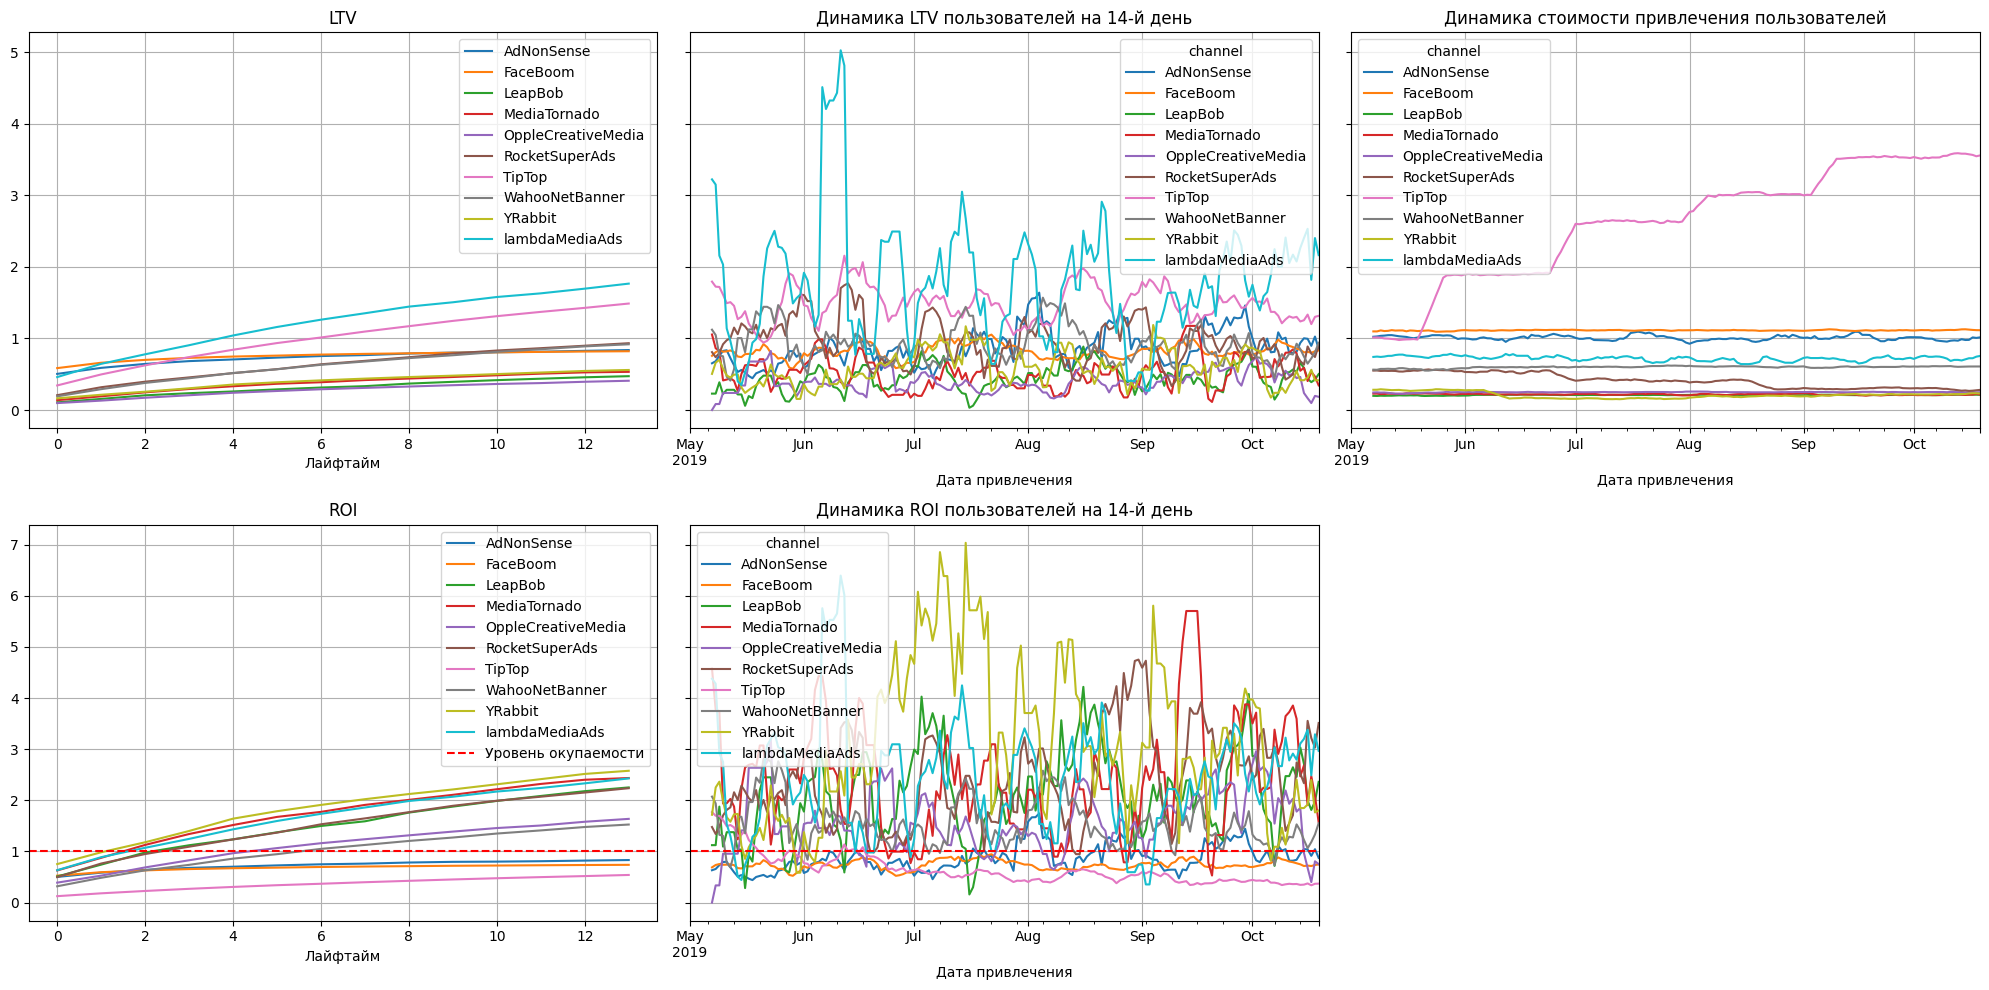

In [37]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** Не окупается реклама только у TipTop, FaceBoom, AdNonSense. Динамика стоимости привлечения пользователей растет с каждым месяцем только у канала TipTop.

 ### Окупается ли реклама, направленная на привлечение пользователей в целом?

Исходя из предоставленных данных, можно сделать вывод, что в целом рекламная кампания не окупается для общего количества пользователей. Показатель ROI к 14-му дню равен 80%, указывая на неэффективность инвестиций в рекламу. Динамика пользователей к 14-му дню падает с самого начала и к июню становится ниже показателя ROI, что свидетельствует о необходимости пересмотра стратегии маркетинга и улучшения окупаемости рекламной кампании.

### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Негативное влияние по окупаемость рекламы оказывают пользователи из United States, использующие iPhone, Mac и Android, а также пришедшие из каналов TipTop, FaceBoom и AdNonSence. Их стоимость привлечения пользователей из США выше, чем у пользователей из других стран, использующих другие устройства или пришедших из других каналов.


### Чем могут быть вызваны проблемы окупаемости?

Исходя из предоставленной информации, можно сделать вывод, что проблемы окупаемости возникают из-за высоких затрат на привлечение основной массы клиентов, чьи расходы не окупаются. Показатель ROI у этих пользователей составляет всего 70-85% к 14 лайвтайму, что указывает на неэффективность инвестиций в их привлечение. Для улучшения ситуации возможно потребуется пересмотреть стратегию маркетинга и продаж, чтобы обеспечить более высокую окупаемость затрат на привлечение клиентов.

## Напишем выводы

- Выделим причины неэффективности привлечения пользователей.
- Сформулируем рекомендации для отдела маркетинга.

Основнами причинами неэффективности привлечения пользователей являются пользователи с рекламных источников: TipTop, FaceBoom и AdNonSence. Вероятнее всего, пользователи пришедшие с этих каналов находятся в США и владеют устройстввами iPhone. А именно такие пользователи являются основными клиентами. Следует пересмотреть условия и стоимость услуг этих каналов, а так же обратить внимание на каналы AdNonSense и lambdaMediaAds, они хоть и привели меньше всего пользователей, имеют одни из самых высоких долей активных покупателей. Это может указывать на эффективность данных каналов в привлечении целевой аудитории, готовой к совершению покупок.

**Рекомендации для отдела маркетинга:**

1. Пересмотреть условия и стоимость услуг рекламных каналов TipTop, FaceBoom и AdNonSence, чтобы уменьшить стоимость привлечения целевой аудитории из США, владеющей устройствами iPhone.
2. Обратить внимание на каналы AdNonSense и lambdaMediaAds, которые, хоть и привели меньше пользователей, имеют высокую долю активных покупателей. Это может указывать на их эффективность в привлечении целевой аудитории готовой к совершению покупок.
3. Исследовать возможности оптимизации рекламных кампаний на каналах с высокой долей активных покупателей для увеличения конверсии и окупаемости.
4. Для пользователей которые окупаются, придумать или разработать акции, подарки или промокоды.
